In [1]:
import keras
from keras.utils import to_categorical
import pandas as pd
import numpy as np
import json

Using TensorFlow backend.


In [2]:
with open('PoseNettrain.json') as f:
  file = json.load(f)

In [3]:
data = file['data']
x_train =[]
y_train = []

def labelToNumerical(label):
    if label == 'WarriorPoseI':
        return 0
    if label == 'WarriorPoseII':
        return 1
    if label == 'WarriorPoseIII':
        return 2
    if label == 'TreePose':
        return 3

i = 0
for i in range(len(data)):
    kpsArr = []
    labels = []
    for kps in data[i]['xs'].items():
        kpsArr.append(kps[1])
    for label in data[i]['ys'].items():
        labels.append(labelToNumerical(label[1]))
    x_train.append(kpsArr)
    y_train.append(labels)
    

In [4]:
print(x_train[0])
x_train = np.asarray(x_train)
print(x_train.shape)
print(x_train[0])

[256.0, 84.75, 256.0, 118.65, 243.2, 118.65, 268.8, 73.45, 288.0, 39.55, 262.4, 118.65, 268.8, 73.45, 288.0, 33.9, 230.4, 192.1, 172.8, 186.45, 185.6, 242.95, 256.0, 192.1, 300.8, 231.65, 352.0, 265.55, 256.0, 84.75, 0, 0, 256.0, 90.4]
(376, 34)
[256.    84.75 256.   118.65 243.2  118.65 268.8   73.45 288.    39.55
 262.4  118.65 268.8   73.45 288.    33.9  230.4  192.1  172.8  186.45
 185.6  242.95 256.   192.1  300.8  231.65 352.   265.55 256.    84.75
   0.     0.   256.    90.4 ]


In [5]:
print(y_train[0])
y_train = np.asarray(y_train)
print(y_train.shape)
print(y_train[0])

[0]
(376, 1)
[0]


In [6]:
y_cat_train = to_categorical(y_train,4)

In [7]:
y_cat_train[0]

array([1., 0., 0., 0.], dtype=float32)

# Building the model

In [12]:
from keras.models import Sequential
from keras.layers import Dense, Dropout, Activation

model = Sequential()

model.add(Dense(8, activation='relu'))
model.add(Dense(4, activation='softmax'))
model.compile(loss='categorical_crossentropy', optimizer='rmsprop', metrics=['accuracy'])

hist = model.fit(x_train, y_cat_train, verbose=1, epochs=50)

Epoch 1/50
376/376 [==============================] - 0s 143us/step - loss: 117.3049 - accuracy: 0.0612
Epoch 2/50
376/376 [==============================] - 0s 21us/step - loss: 37.6429 - accuracy: 0.1809
Epoch 3/50
376/376 [==============================] - 0s 24us/step - loss: 22.9313 - accuracy: 0.2314
Epoch 4/50
376/376 [==============================] - 0s 24us/step - loss: 15.0988 - accuracy: 0.2074
Epoch 5/50
376/376 [==============================] - 0s 24us/step - loss: 8.4711 - accuracy: 0.2234
Epoch 6/50
376/376 [==============================] - 0s 24us/step - loss: 4.1297 - accuracy: 0.5426
Epoch 7/50
376/376 [==============================] - 0s 27us/step - loss: 2.4267 - accuracy: 0.5957
Epoch 8/50
376/376 [==============================] - 0s 24us/step - loss: 1.1896 - accuracy: 0.7074
Epoch 9/50
376/376 [==============================] - 0s 27us/step - loss: 0.3592 - accuracy: 0.7926
Epoch 10/50
376/376 [==============================] - 0s 24us/step - loss: 0.0864 - 

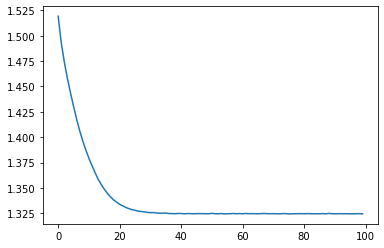

In [9]:
import matplotlib.pyplot as plt
%matplotlib inline

plt.plot(hist.history['loss'])


In [13]:
model.save('test.h5')